In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('BNBUSD_1m_Binance.csv')
print(df.head())

             Open time  Open  High  Low  Close  Volume  \
0  2017-11-06 03:54:00   1.5  1.50  1.5   1.50   10.83   
1  2017-11-06 03:55:00   1.3  1.30  1.3   1.30    1.00   
2  2017-11-06 03:56:00   1.3  1.30  0.5   0.50   19.00   
3  2017-11-06 03:57:00   0.5  0.61  0.5   0.61  253.00   
4  2017-11-06 03:58:00   1.1  1.10  1.1   1.10   85.00   

                Close time  Quote asset volume  Number of trades  \
0  2017-11-06 03:54:59.999              16.245               2.0   
1  2017-11-06 03:55:59.999               1.300               1.0   
2  2017-11-06 03:56:59.999              24.356               6.0   
3  2017-11-06 03:57:59.999             151.660              17.0   
4  2017-11-06 03:58:59.999              93.500               1.0   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                        10.83                        16.245     0.0  
1                         0.00                         0.000     0.0  
2                         0.3

In [3]:
df = df.drop(columns=['Open time','Close time'])

In [4]:
print(df.head())

   Open  High  Low  Close  Volume  Quote asset volume  Number of trades  \
0   1.5  1.50  1.5   1.50   10.83              16.245               2.0   
1   1.3  1.30  1.3   1.30    1.00               1.300               1.0   
2   1.3  1.30  0.5   0.50   19.00              24.356               6.0   
3   0.5  0.61  0.5   0.61  253.00             151.660              17.0   
4   1.1  1.10  1.1   1.10   85.00              93.500               1.0   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                        10.83                        16.245     0.0  
1                         0.00                         0.000     0.0  
2                         0.33                         0.429     0.0  
3                         0.00                         0.000     0.0  
4                         0.00                         0.000     0.0  


In [5]:
df = df.drop(columns=['Ignore','Taker buy base asset volume','Taker buy quote asset volume'])

In [6]:
print(df)

          Open    High     Low   Close  Volume  Quote asset volume  \
0       1.5000  1.5000  1.5000  1.5000   10.83           16.245000   
1       1.3000  1.3000  1.3000  1.3000    1.00            1.300000   
2       1.3000  1.3000  0.5000  0.5000   19.00           24.356000   
3       0.5000  0.6100  0.5000  0.6100  253.00          151.660000   
4       1.1000  1.1000  1.1000  1.1000   85.00           93.500000   
...        ...     ...     ...     ...     ...                 ...   
187461  9.0934  9.1149  9.0701  9.1100  614.62         5585.887417   
187462  9.1005  9.1145  9.0740  9.0740  754.35         6868.775742   
187463  9.0748  9.1243  9.0745  9.1041  457.06         4162.123352   
187464  9.1063  9.1100  9.1041  9.1042  336.45         3063.326275   
187465  9.1000     NaN     NaN     NaN     NaN                 NaN   

        Number of trades  
0                    2.0  
1                    1.0  
2                    6.0  
3                   17.0  
4                    1.0

In [7]:
print(df.head())

   Open  High  Low  Close  Volume  Quote asset volume  Number of trades
0   1.5  1.50  1.5   1.50   10.83              16.245               2.0
1   1.3  1.30  1.3   1.30    1.00               1.300               1.0
2   1.3  1.30  0.5   0.50   19.00              24.356               6.0
3   0.5  0.61  0.5   0.61  253.00             151.660              17.0
4   1.1  1.10  1.1   1.10   85.00              93.500               1.0


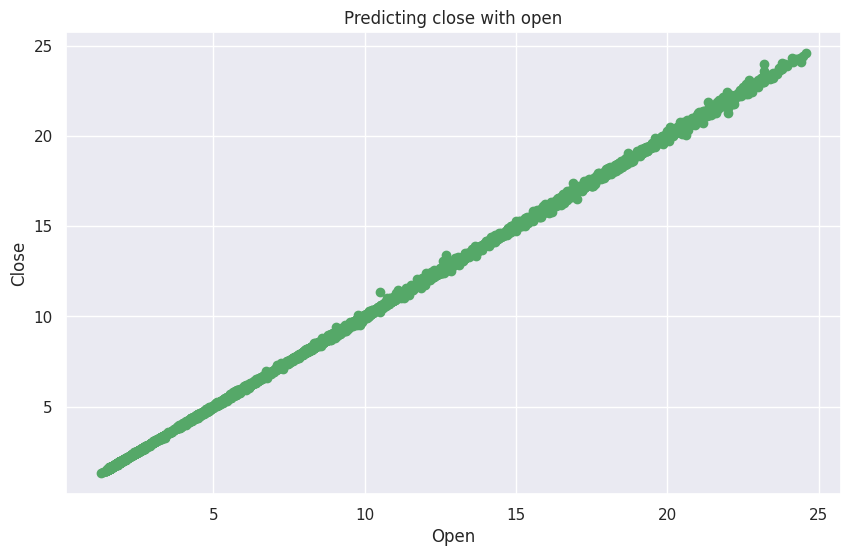

In [29]:
x = df[['Open']]
y = df[['Close']]
plt.figure(figsize=(10,6))
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Predicting close with open')
plt.scatter(x,y, marker='o', color='g')

In [9]:
df_sampled = df.sample(frac=0.1, random_state=42)


df_sampled.to_csv('reduced_file.csv', index=False)

In [10]:
df = pd.read_csv('reduced_file.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18747 entries, 0 to 18746
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                18747 non-null  float64
 1   High                18747 non-null  float64
 2   Low                 18747 non-null  float64
 3   Close               18747 non-null  float64
 4   Volume              18747 non-null  float64
 5   Quote asset volume  18747 non-null  float64
 6   Number of trades    18747 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB
None


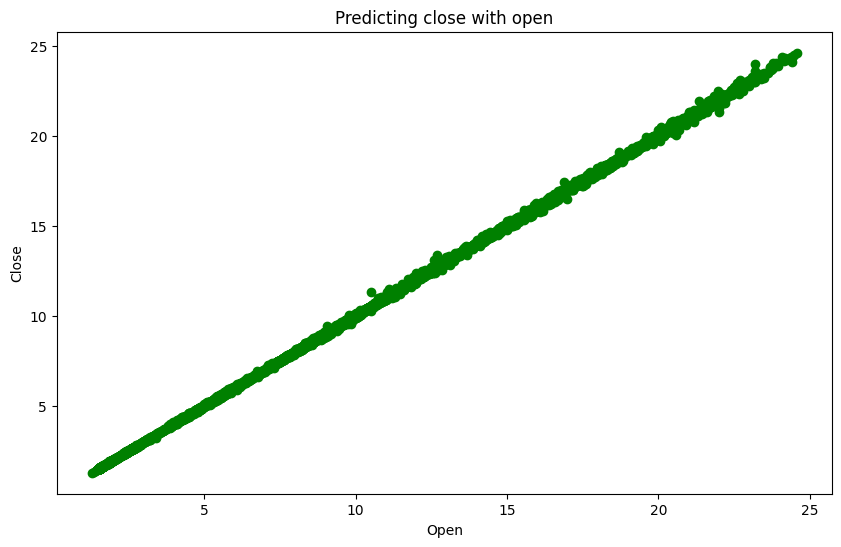

In [11]:
x = df[['Open']]
y = df[['Close']]
plt.figure(figsize=(10,6))
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Predicting close with open')
plt.scatter(x,y, marker='o', color='g')

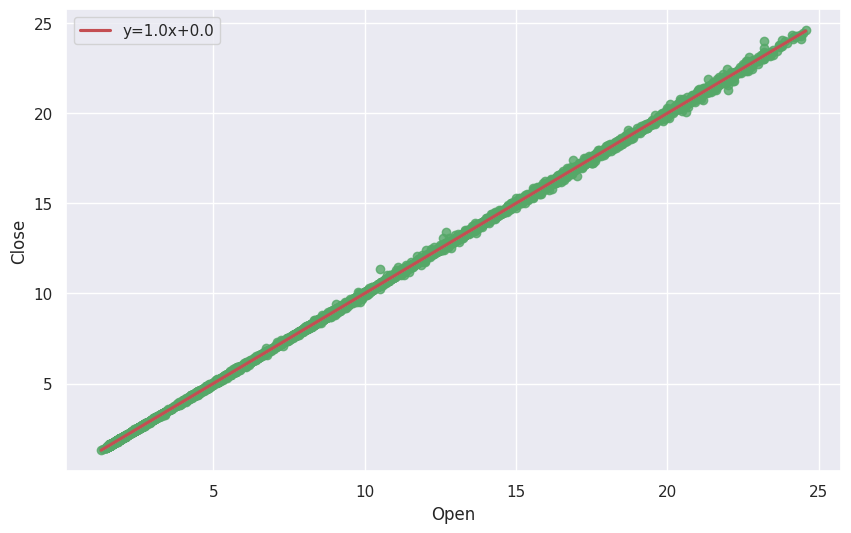

In [12]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Open'],df['Close'])

f = plt.figure(figsize=(10,6))
data = df[['Open','Close']]
ax = sns.regplot(x='Open', y='Close', data=data,
                 scatter_kws={"color": "g"},
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [13]:
print(slope, intercept)

0.9996798606382374 0.0017027231781092667


In [14]:
print(std_err)

5.923960472727761e-05


In [15]:
X = df['Open'].values
Y = df['Close'].values

In [16]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [17]:
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)
slope = numerator / denominator
intercept = mean_Y - slope * mean_X

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

Slope (m): 0.9996798606382375
Intercept (b): 0.0017027231781092667


In [18]:
#multi dimensional linear regression where open and close are dependent variable and high is independent variable using numpy and pandas

In [19]:
X = df[['Open', 'Close']].values
Y = df['High'].values

In [20]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

print(f"Coefficients: {coefficients}")

intercept = coefficients[0]
slopes = coefficients[1:]

print(f"Intercept (b0): {intercept}")
print(f"Slopes (b1, b2, ...): {slopes}")

Y_pred = X @ coefficients

print("\nActual vs Predicted:")
print(pd.DataFrame({'Actual': Y, 'Predicted': Y_pred}))

Coefficients: [-0.00633921  0.51513964  0.48772896]
Intercept (b0): -0.006339209427881674
Slopes (b1, b2, ...): [0.51513964 0.48772896]

Actual vs Predicted:
        Actual  Predicted
0       8.6171   8.619874
1       1.8890   1.888080
2       9.2435   9.257336
3       8.7900   8.803676
4       8.5500   8.508821
...        ...        ...
18742  21.1199  21.066894
18743   2.1506   2.150430
18744   5.3200   5.328922
18745   9.5254   9.541009
18746   5.5002   5.506273

[18747 rows x 2 columns]


In [21]:
#linear regression using gradient descent

In [22]:

X = df[['Open']].values
Y = df['High'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))


Y = Y.reshape(-1, 1)

m = X_scaled.shape[0]
n = X_scaled.shape[1]


learning_rate = 0.001
iterations = 1000

theta = np.zeros((n, 1))

for _ in range(iterations):
    Y_pred = X_scaled @ theta

    error = Y_pred - Y

    error = error.reshape(-1, 1)

    gradient = (1 / m) * X_scaled.T @ error

    theta -= learning_rate * gradient

print("Coefficients:", theta)


Coefficients: [[5.1235473 ]
 [3.29707129]]


In [23]:
#ridge regression
X = df[['Open']].values
y = df['High'].values

X = np.hstack([np.ones((X.shape[0], 1)), X])
lambda_ = 0.1

m, n = X.shape
I = np.eye(n)
I[0, 0] = 0

beta = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

intercept = beta[0]
slopes = beta[1:]

print(f"Intercept (b0): {intercept}")
print(f"Slopes (b1, b2, ...): {slopes}")

y_pred = X @ beta

print("\nActual vs Predicted:")
print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}))


Intercept (b0): -0.005507142695098932
Slopes (b1, b2, ...): [1.00271226]

Actual vs Predicted:
        Actual  Predicted
0       8.6171   8.613607
1       1.8890   1.888616
2       9.2435   9.263064
3       8.7900   8.798307
4       8.5500   8.528076
...        ...        ...
18742  21.1199  21.171676
18743   2.1506   2.150926
18744   5.3200   5.328922
18745   9.5254   9.545327
18746   5.5002   5.509611

[18747 rows x 2 columns]


In [24]:
#lasso regression
X = df[['Open']].values
y = df['High'].values

X = np.hstack([np.ones((X.shape[0], 1)), X])

lambda_ = 0.1
num_iterations = 1000
learning_rate = 0.01

m, n = X.shape
coefficients = np.zeros(n)

for _ in range(num_iterations):
    for j in range(n):
        residual = y - (X @ coefficients - X[:, j] * coefficients[j])

        rho = np.sum(X[:, j] * residual)
        if j == 0:
            coefficients[j] = rho / np.sum(X[:, j] ** 2)
        else:
            if rho < -lambda_:
                coefficients[j] = (rho + lambda_) / np.sum(X[:, j] ** 2)
            elif rho > lambda_:
                coefficients[j] = (rho - lambda_) / np.sum(X[:, j] ** 2)
            else:
                coefficients[j] = 0

print(f"Coefficients: {coefficients}")


Coefficients: [-0.00550715  1.00271227]


In [25]:
#elastic net

In [ ]:
X = df[['Open']].values  
y = df['High'].values   

X = np.hstack([np.ones((X.shape[0], 1)), X])

lambda1 = 0.1  
lambda2 = 0.1  
num_iterations = 1000  
learning_rate = 0.01  

m, n = X.shape
coefficients = np.zeros(n)

for _ in range(num_iterations):
    predictions = X @ coefficients
    residuals = predictions - y
    gradient = (1 / m) * (X.T @ residuals) + lambda2 * coefficients

    for j in range(1, n): 
        if coefficients[j] > learning_rate * lambda1:
            gradient[j] -= learning_rate * lambda1
        elif coefficients[j] < -learning_rate * lambda1:
            gradient[j] += learning_rate * lambda1
        else:
            gradient[j] = 0

    coefficients -= learning_rate * gradient

print(f"Coefficients: {coefficients}")


Coefficients: [7.36622391 0.        ]


In [1]:
#gradient descent in. multidimensional feature

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = df[['Open', 'Low', 'Close']].values  
Y = df['High'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
Y = Y.reshape(-1, 1)
m = X_scaled.shape[0]  
n = X_scaled.shape[1]  
learning_rate = 0.001
iterations = 1000
theta = np.zeros((n, 1))  

for _ in range(iterations):
    Y_pred = X_scaled @ theta
    error = Y_pred - Y
    gradient = (1 / m) * X_scaled.T @ error
    theta -= learning_rate * gradient

print("Coefficients:", theta)


NameError: name 'df' is not defined